In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# import the data to plot
CRindir = '/Volumes/My Passport/coarse_run/'
HRindir = '/Volumes/My Passport/high_res/'

#import grid params for CR grid

in_file = '%sgrid/HFacC.data' % CRindir
HFCR = np.fromfile(in_file, dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)

in_file = '%sgrid/XC.data' % CRindir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(160,360)

in_file = '%sgrid/YC.data' % CRindir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(160,360)

in_file = '/Users/sclayton/Documents/darwin_model/eg_grid/RA.data'
RA = np.fromfile(in_file, dtype = '>f')
RA = RA.reshape(160,360)

## pick a nutrient 0 = phosphate, 1 = nitrate, 2 = iron, 3 = silica
v=1

# import CR data

in_file = '%supflux/CR_WN.1999.data' % CRindir
CRWN = np.fromfile(in_file, dtype='>f').reshape(4,160, 360)
CRmask = ma.masked_where(HFCR[6,:,:] == 0, CRWN[v,:,:], copy=False)

#import grid params for HR grid
HFHR = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/hFacC')
XG = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/XG')
YG = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/YG')
RAC = mit.rdmds('/Users/sclayton/Documents/darwin_model/e2_grid/RAC')

# import HR data
in_file = '%supflux/WN.1999.data' % HRindir
HRWN = np.fromfile(in_file, dtype='>f').reshape(4, 510, 3060)
HRmask = ma.masked_where(HFHR[10,:,:] == 0, HRWN[v,:,:], copy=False)

/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


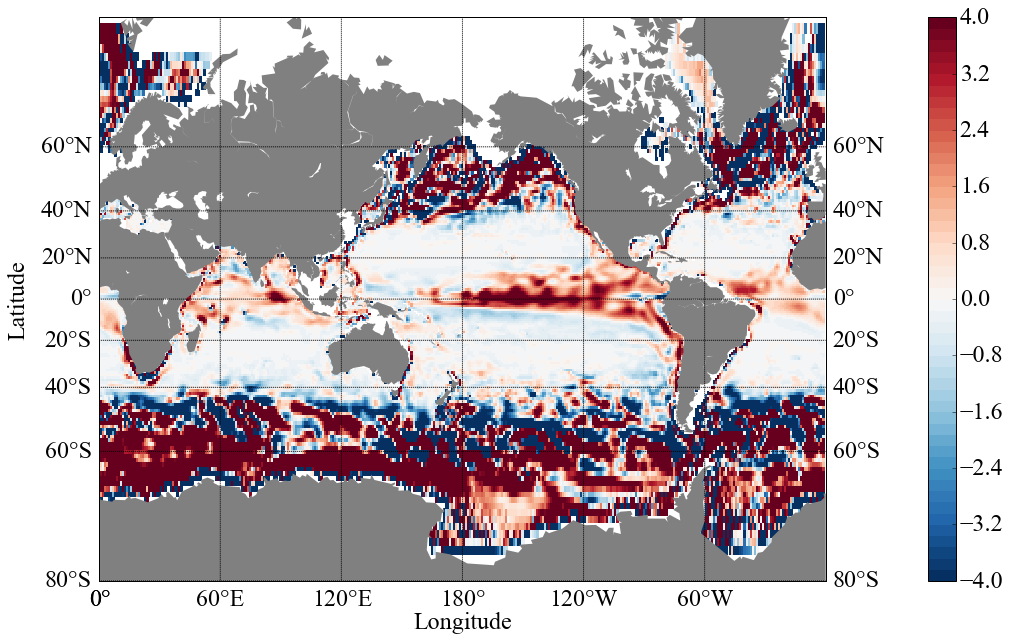

In [3]:
fig1 = plt.figure(1, figsize=(18,9), dpi = 600)

palette = plt.get_cmap('RdBu_r', 50)

#x=mit.rdmds('XG'); y=mit.rdmds('YG'); e=mit.rdmds('Eta',np.Inf)
mp = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=0,urcrnrlon=360,lat_ts = 0, resolution='c')
xm, ym = mp(XC,YC)
#mp.contour(xm, ym, HFCR, [0], colors='k', lw=1)
mp.pcolormesh(xm, ym, CRmask,shading='flat', vmin= -4, vmax = 4, cmap = palette)

mp.fillcontinents(color = 'grey')
mp.drawmapboundary()
mp.drawparallels(np.arange(-80,80,20),labels=[1,1,0,1], fontsize=24)
mp.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1], fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Longitude', fontsize = 24, labelpad = 30)
plt.ylabel('Latitude', fontsize = 24, labelpad = 70)

cbar = plt.colorbar(pad = 0.08)
cbar.ax.tick_params(labelsize=24)

plt.show()

#plt.pcolormesh(XG, YG,HFHR,shading='flat', vmin= -2, vmax = 2,cmap = palette)
#plt.axis([-180, 180, -80, 80])
#plt.colorbar()
#plt.show()


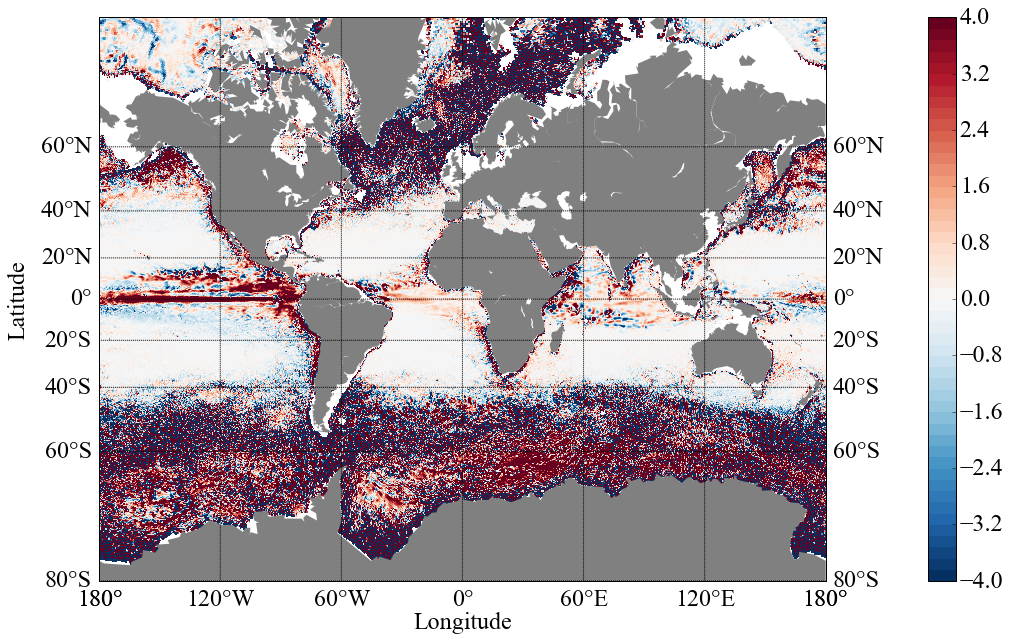

In [4]:
fig2 = plt.figure(2, figsize=(18,9), dpi = 600)

palette = plt.get_cmap('RdBu_r', 50)

#x=mit.rdmds('XG'); y=mit.rdmds('YG'); e=mit.rdmds('Eta',np.Inf)
mp = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts = 0, resolution='c')

h = cs.pcol(XG, YG,HRmask, projection = mp, vmin= -4, vmax = 4, cmap = palette)

mp.fillcontinents(color = 'grey')
mp.drawmapboundary()
mp.drawparallels(np.arange(-80,80,20),labels=[1,1,0,1], fontsize=24)
mp.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1], fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=24)
plt.tick_params(axis='both', which='minor', labelsize=24)
plt.xlabel('Longitude', fontsize = 24, labelpad = 30)
plt.ylabel('Latitude', fontsize = 24, labelpad = 70)

cbar = plt.colorbar(pad = 0.08)
cbar.ax.tick_params(labelsize=24)

plt.show()

#plt.pcolormesh(XG, YG,HFHR,shading='flat', vmin= -2, vmax = 2,cmap = palette)
#plt.axis([-180, 180, -80, 80])
#plt.colorbar()
#plt.show()

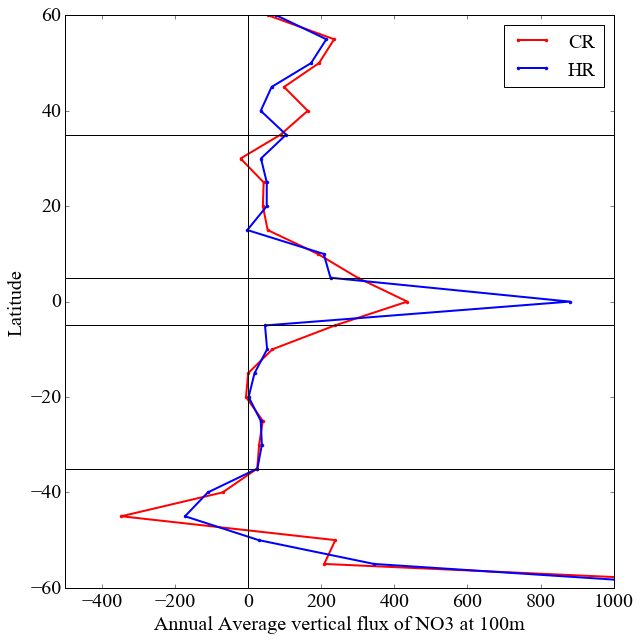

In [5]:
# work out the latitudinally averaged vertical nutrient supply

# EG
CRHFmask = CRmask *HFCR[6,:,:]*RA
binsize = 5
ybin = np.arange(-60, 60+binsize, binsize)

binnedcr = np.empty([len(ybin)])
numobs = np.empty([len(ybin)])
areacr = np.empty([len(ybin)])

for i in range(len(ybin)):
    lat = ybin[i]

    nn = len((YC>=lat-binsize/2) & (YC<lat +binsize/2))
    if nn > 0:
        #print YC[[(YC>(lat-binsize/2)) & (YC<(lat +binsize/2))]]
        areacr[i] = np.nansum(RA[(YC>=lat-binsize/2) & (YC<lat +binsize/2)])
        binnedcr[i] = np.nansum(CRHFmask[(YC>=lat-binsize/2) & (YC<lat +binsize/2)])/areacr[i]
        numobs[i] = nn
    
    else:
        binnedcr[i] = np.nan
        numobs[i] = np.nan

# E2
HRHFmask = HRmask *HFHR[10,:,:]*RAC

binnedhr = np.empty([len(ybin)])
numobs = np.empty([len(ybin)])
areahr = np.empty([len(ybin)])

for i in range(len(ybin)):
    lat = ybin[i]

    nn = len((YG>=lat-binsize/2) & (YG<lat +binsize/2))
    if nn > 0:
        #print YC[[(YC>(lat-binsize/2)) & (YC<(lat +binsize/2))]]
        areahr[i] = np.nansum(RAC[(YG>=lat-binsize/2) & (YG<lat +binsize/2)])
        binnedhr[i] = np.nansum(HRHFmask[(YG>=lat-binsize/2) & (YG<lat +binsize/2)])/areahr[i]
        numobs[i] = nn
    
    else:
        binnedhr[i] = np.nan
        numobs[i] = np.nan

s_to_y = 365 

fig3 = plt.figure(3, figsize=(9,9), dpi = 600)

plt.plot(binnedcr*s_to_y, ybin,'.-r', label = 'CR', lw =2)
plt.plot(binnedhr*s_to_y, ybin,'.-b',label= 'HR',lw = 2)
plt.ylabel('Latitude', fontsize=20)
plt.legend(fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel(r'Annual Average vertical flux of NO3 at 100m', fontsize=20)
plt.axvline(0, color='k')
plt.axhline(35, color='k')
plt.axhline(5, color='k')
plt.axhline(-5, color='k')
plt.axhline(-35, color='k')
plt.axis([-500, 1000, -60, 60])
plt.show()


In [6]:
print np.shape(HFHR)

(50, 510, 3060)


In [7]:
latmin = [35, 5, -5, -35, -60]
latmax = [60, 35, 5, -5, -35]

region = ['N SPolar', 'N STropic', 'Eq', 'S STropic', 'S SPolar']

for l in range(len(latmax)):
    HRint = HRWN[v,:,:]*HFHR[10,:,:]*RAC
    subset = HRint[(YG>=latmin[l]) & (YG<latmax[l])]
    
    print region[l]
    print 'ECCO2', np.nansum(subset)*365/(np.sum(RAC[(YG>=latmin[l]) & (YG<latmax[l])]))

    CRint = CRWN[v,:,:]*HFCR[6,:,:]*RA
    subset = CRint[(YC>=latmin[l]) & (YC<latmax[l])]
    print 'ECCO-Godae', np.nansum(subset)*365/(np.sum(RA[(YC>=latmin[l]) & (YC<latmax[l])]))
    print '\n'

N SPolar
ECCO2 108.104645107
ECCO-Godae 142.068670103


N STropic
ECCO2 84.736149685
ECCO-Godae 85.8775559197


Eq
ECCO2 453.102905875
ECCO-Godae 383.713050873


S STropic
ECCO2 33.053982032
ECCO-Godae 43.6549646081


S SPolar
ECCO2 87.0795404542
ECCO-Godae 106.403139997


